Liczba eigenfaces potrzebna do zachowania >25% informacji: 34


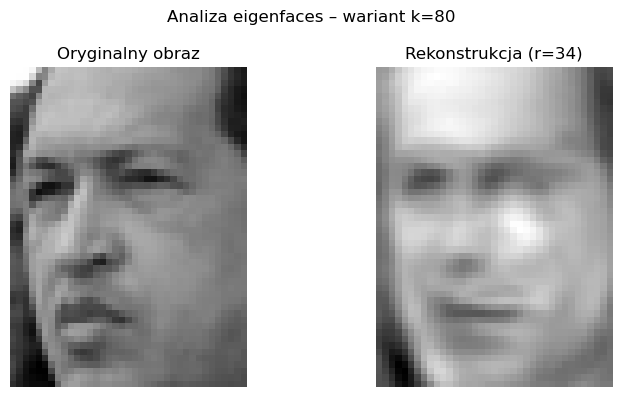

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

# Załaduj dane – zestaw twarzy LFW
lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw.images.shape

X = lfw.data  # obrazy jako wektory
n_features = X.shape[1]
mean_face = np.mean(X, axis=0)
X_centered = X - mean_face

# SVD
U, S, VT = np.linalg.svd(X_centered.T, full_matrices=False)

# Oblicz sumaryczną wariancję
explained_variance = S**2
explained_variance_ratio = explained_variance / explained_variance.sum()
cumulative_variance = np.cumsum(explained_variance_ratio)

# Znajdź minimalną liczbę składowych do zachowania >25% wariancji
r = np.argmax(cumulative_variance >= 0.25) + 1
print(f"Liczba eigenfaces potrzebna do zachowania >25% informacji: {r}")

# Rekonstrukcja przykładowego obrazu
i = 0  # indeks testowego obrazu
U_r = U[:, :r]
x_test = X_centered[i]
x_reconstructed = U_r @ (U_r.T @ x_test) + mean_face

# Wizualizacja
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(X[i].reshape((h, w)), cmap='gray')
axes[0].set_title("Oryginalny obraz")
axes[0].axis("off")
axes[1].imshow(x_reconstructed.reshape((h, w)), cmap='gray')
axes[1].set_title(f"Rekonstrukcja (r={r})")
axes[1].axis("off")
plt.suptitle("Analiza eigenfaces – wariant k=25")
plt.tight_layout()
plt.show()